1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
    1. Which are the teams which started playing between 1930-1980?
    2. Which are the top 5 teams in terms of points?
    3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
    4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
laliga=pd.read_csv('Laliga.csv')
laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [147]:
l=laliga.iloc[0]
dic=dict(l)
print(dic)

{'Unnamed: 0': 'Pos', 'Unnamed: 1': 'Team', 'Unnamed: 2': 'Seasons', 'Unnamed: 3': 'Points', 'Unnamed: 4': 'GamesPlayed', 'Unnamed: 5': 'GamesWon', 'Unnamed: 6': 'GamesDrawn', 'Unnamed: 7': 'GamesLost', 'Unnamed: 8': 'GoalsFor', 'Unnamed: 9': 'GoalsAgainst', 'Unnamed: 10': 'Champion', 'Unnamed: 11': 'Runner-up', 'Unnamed: 12': 'Third', 'Unnamed: 13': 'Fourth', 'Unnamed: 14': 'Fifth', 'Unnamed: 15': 'Sixth', 'Unnamed: 16': 'T', 'Unnamed: 17': 'Debut', 'Unnamed: 18': 'Since/LastApp', 'Unnamed: 19': 'BestPosition'}


In [148]:
laliga.rename(columns=dic,inplace=True)
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [149]:
laliga.drop(0,inplace=True)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
58,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
59,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
60,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15


In [150]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: object(20)
memory usage: 10.0+ KB


In [151]:
laliga=laliga.replace('-',0)

In [152]:
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
58,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
59,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16
60,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15


In [153]:
l=laliga.columns
l=l.drop(['Team','Debut','Since/LastApp'])

In [154]:
for i in l:
    laliga[i]=laliga[i].astype(float)

In [155]:
laliga.dtypes

Pos              float64
Team              object
Seasons          float64
Points           float64
GamesPlayed      float64
GamesWon         float64
GamesDrawn       float64
GamesLost        float64
GoalsFor         float64
GoalsAgainst     float64
Champion         float64
Runner-up        float64
Third            float64
Fourth           float64
Fifth            float64
Sixth            float64
T                float64
Debut             object
Since/LastApp     object
BestPosition     float64
dtype: object

In [156]:
laliga.isna().sum()

Pos              0
Team             0
Seasons          0
Points           0
GamesPlayed      0
GamesWon         0
GamesDrawn       0
GamesLost        0
GoalsFor         0
GoalsAgainst     0
Champion         0
Runner-up        0
Third            0
Fourth           0
Fifth            0
Sixth            0
T                0
Debut            0
Since/LastApp    0
BestPosition     0
dtype: int64

### 1. Which are the teams which started playing between 1930-1980?

In [157]:
laliga_1930_to_1980 = laliga[(laliga['Debut'].str[:4]>='1930') & (laliga['Debut'].str[:4]<='1980')][['Team','Debut']]
laliga_1930_to_1980

,Team,Debut
4,Valencia,1931-32
6,Sevilla,1934-35
9,Zaragoza,1939-40
10,Real Betis,1932-33
11,Deportivo La Coruna,1941-42
12,Celta Vigo,1939-40
13,Valladolid,1948-49
15,Sporting Gijon,1944-45
16,Osasuna,1935-36
17,Malaga,1949-50


### 2. Which are the top 5 teams in terms of points?

In [180]:
laliga[['Team','Points']].sort_values(by='Points',ascending=False).head()

,Team,Points
1,Real Madrid,4385.0
2,Barcelona,4262.0
3,Atletico Madrid,3442.0
4,Valencia,3386.0
5,Athletic Bilbao,3368.0


In [181]:
laliga.sort_values(by='Points',ascending=False)[['Team','Points']].head()

,Team,Points
1,Real Madrid,4385.0
2,Barcelona,4262.0
3,Atletico Madrid,3442.0
4,Valencia,3386.0
5,Athletic Bilbao,3368.0


### 3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [183]:
laliga_1=laliga

laliga_1['winning_percentage']=(laliga_1['GamesWon']/laliga_1['GamesPlayed'])*100
laliga_1.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,winning_percentage
1,1.0,Real Madrid,86.0,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,...,23.0,8.0,8.0,3.0,4.0,79.0,1929,1929,1.0,59.630702
2,2.0,Barcelona,86.0,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,...,25.0,12.0,12.0,4.0,6.0,83.0,1929,1929,1.0,57.241130
3,3.0,Atletico Madrid,80.0,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,...,8.0,16.0,9.0,7.0,6.0,56.0,1929,2002-03,1.0,47.475134
4,4.0,Valencia,82.0,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,...,6.0,10.0,11.0,10.0,7.0,50.0,1931-32,1987-88,1.0,44.557057
5,5.0,Athletic Bilbao,86.0,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,...,7.0,10.0,5.0,8.0,10.0,49.0,1929,1929,1.0,43.772629


In [186]:
# Top 5 teams in terms of winning percentage

laliga_1.sort_values(by='winning_percentage',ascending=False).head()[['Team','winning_percentage']]

,Team,winning_percentage
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


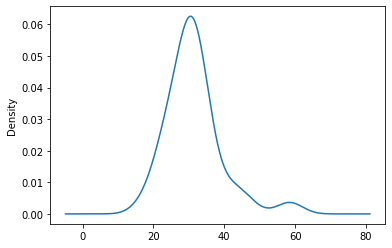

In [196]:
# distribution of winning_percenatge

((laliga_1['GamesWon'].astype(int)/laliga_1['GamesPlayed'].astype(int))*100).plot(kind='kde')

### 4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [200]:
a=laliga_1[(laliga_1['BestPosition']>=1) & (laliga_1['BestPosition']<=3)]
b=laliga_1[laliga_1['BestPosition'].between(4,7)]

In [201]:
import scipy.stats as stats

stats.ttest_ind(a['winning_percentage'],b['winning_percentage'])

Ttest_indResult(statistic=4.992715339447283, pvalue=1.5362101870160483e-05)

Since, pvalue(1.536 * 10^-5) < alpha(0.05), we can reject H0 and conclude that there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

    a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?
    
    b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
    
    c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
    
    d) Which of the two above intervals are wider?
    
    e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [207]:
xbar = 140          # sample mean
sigma = 25         # population standard deviation
n=200              # size of sample

### a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [208]:
se = sigma/np.sqrt(n)                 # se :standard error
se

1.7677669529663687

### b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [211]:
import scipy.stats as stats

interval_1=stats.t.interval(0.95,loc=xbar,scale=se,df=n-1)
interval_1

(136.51404038839016, 143.48595961160984)

### c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [212]:
n2=100
se2=sigma/np.sqrt(n2)

interval_2=stats.t.interval(0.95,loc=xbar,scale=se2,df=n2-1)
interval_2

(135.03945762122828, 144.96054237877172)

# D) Which of the following interval size is wider?

In [213]:
print('Interval for sample size of {} is {}'.format(n,interval_1))
print('Interval for sample size of {} is {}'.format(n2,interval_2))

Interval for sample size of 200 is (136.51404038839016, 143.48595961160984)
Interval for sample size of 100 is (135.03945762122828, 144.96054237877172)


### Interval of size 100 is wider

### e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [214]:
print('standard error of sample size 200 is ',se)
print('standard error of sample size 100 is ',se2)

standard error of sample size 200 is  1.7677669529663687
standard error of sample size 100 is  2.5


Standard error is the standard deviation of the sample distribution.The sample size increases i.e. the sample size move towards attaining the true population size, because of which sample mean tends to move towards the population mean and hence the standrad error decreases with increase in sample size

3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

    1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving     distances of the current and new golf balls.
    2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
    3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [3]:
golf=pd.read_csv('Golf.csv')
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [216]:
golf.shape

(40, 2)

In [217]:
golf.dtypes

Current    int64
New        int64
dtype: object

In [218]:
golf.isnull().sum()

Current    0
New        0
dtype: int64

In [219]:
# Statical way of checking the distribution and outliers:

golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


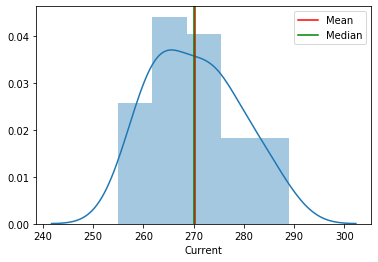

skew : 0.29456628634379833


In [233]:

sns.distplot(golf['Current'])
plt.axvline(np.mean(golf['Current']),color='Red',label='Mean')
plt.axvline(np.median(golf['Current']),color='Green',label='Median')
plt.legend()
plt.show()

print('skew :',stats.skew(golf['Current']))

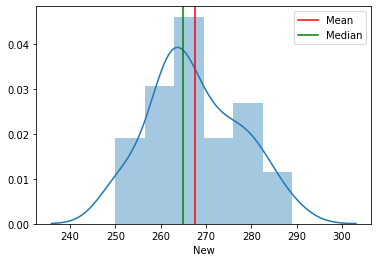

skew : 0.23072220761583526


In [232]:

sns.distplot(golf['New'])
plt.axvline(np.mean(golf['New']),color='Red',label='Mean')
plt.axvline(np.median(golf['New']),color='Green',label='Median')
plt.legend()
plt.show()
print('skew :',stats.skew(golf['New']))

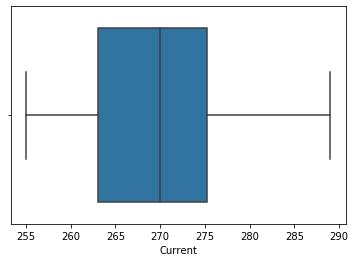

In [234]:
# Outliers :

sns.boxplot(golf['Current'])

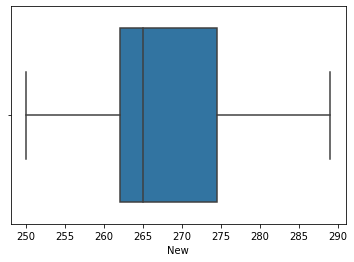

In [235]:
sns.boxplot(golf['New'])

In [236]:
# No outliers and both are bit right skewed

### 1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving     distances of the current and new golf balls.

#### As the population standard deviation is unknown, the nature of  differences between the mean driving distances of the current and the new golf ball can be tested using 2 sampple t test

In [238]:
stat,p_value=stats.ttest_ind(golf['Current'],golf['New'])

print('statistic : ',stat)
print('p_value : ',p_value)

statistic :  1.3283615935245678
p_value :  0.18793228491854663


### 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [239]:
print('P Value : ',p_value)

print('\n Since pvalue > alpha, we are fail to reject null hyp and conculde that there is difference in the mean driving distances of the golf balls with coating and without coating ')

P Value :  0.18793228491854663

 Since pvalue > alpha, we are fail to reject null hyp and conculde that there is difference in the mean driving distances of the golf balls with coating and without coating 


### 3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [243]:
# Current sample :

n1=len(golf['Current'])
mue1=np.mean(golf['Current'])
se1=np.std(golf['Current'])/np.sqrt(n1) 
print(' Confidence Intervals of Current : ',stats.t.interval(0.95,loc=mue1,scale=se1,df=n1-1))

 Confidence Intervals of Current :  (267.51087288314795, 273.039127116852)


In [244]:
# New sample :

n2=len(golf['New'])
mue2=np.mean(golf['New'])
se2=np.std(golf['New'])/np.sqrt(n2) 
print(' Confidence Intervals of Current : ',stats.t.interval(0.95,loc=mue2,scale=se2,df=n2-1))

 Confidence Intervals of Current :  (264.37463162538575, 270.62536837461425)


In [250]:
#  what is the 95% confidence interval for the difference between the means of the two population

a=golf['New']
b=golf['Current']
mu3=abs(np.mean(b)-np.mean(a))
se3=(np.std(a,ddof=1)-np.std(b,ddof=1))/np.sqrt(40)
print('95% confidence interval for the difference between the means of the two population',stats.t.interval(0.95,loc=mu3,scale=se3,df=40))

95% confidence interval for the difference between the means of the two population (2.4094489572435815, 3.140551042756373)
